In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

## START Common Code

In [2]:
class ResultStorage:
    def __init__(self, cols):
        self.result = pd.DataFrame(columns=cols)
        self.columns = cols
    
    def append(self, record):
        r = {c: v for c, v in zip(self.columns, record) }
        self.result = self.result.append(r, ignore_index=True)
        
    
    def summarize(self):
        return self.result     

In [3]:
def get_model_parms(model):
    return "k = {}, sim_options={}, min_k={}".format(model.k, model.sim_options, model.min_k)

In [4]:
def get_top_n(predictions, u_id):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x : x[1], reverse=True)
        top_n[uid] = user_ratings
    return top_n[u_id]

## END Common Code

In [5]:
ratings_raw = pd.read_csv("ratings_Electronics.csv", names=['userId', 'productId', 'rating', 'timestamp'])

In [6]:
ratings_raw.drop('timestamp', axis=1, inplace=True)

In [7]:
ratings_raw.shape

(7824482, 3)

In [8]:
ratings_raw.head()

,userId,productId,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [9]:
ratings_raw.describe(include='all')

,userId,productId,rating
count,7824482,7824482,7.824482e+06
unique,4201696,476002,NaN
top,A5JLAU2ARJ0BO,B0074BW614,NaN
freq,520,18244,NaN
mean,NaN,NaN,4.012337e+00
std,NaN,NaN,1.380910e+00
min,NaN,NaN,1.000000e+00
25%,NaN,NaN,3.000000e+00
50%,NaN,NaN,5.000000e+00
75%,NaN,NaN,5.000000e+00


* Wov, over 4 million users and about half a million products.

5.0    0.528846
4.0    0.159615
1.0    0.128846
2.0    0.098077
3.0    0.084615
Name: rating, dtype: float64


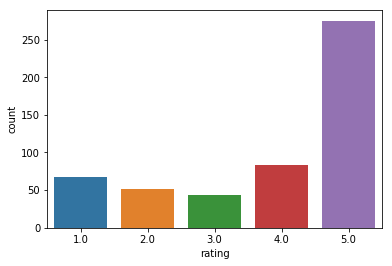

In [10]:
# Since userId = A5JLAU2ARJ0BO has rated most, let's check what is his/her rating pattern
A5JLAU2ARJ0BO_rating = ratings_raw[ratings_raw['userId'] == 'A5JLAU2ARJ0BO']['rating']
print(A5JLAU2ARJ0BO_rating.value_counts(normalize=True))
sns.countplot(A5JLAU2ARJ0BO_rating)

* So user A5JLAU2ARJ0BO mostly gives higher ratings (About 68% ratings are 4 and 5)

5.0    0.699682
4.0    0.182690
3.0    0.057992
1.0    0.030914
2.0    0.028722
Name: rating, dtype: float64


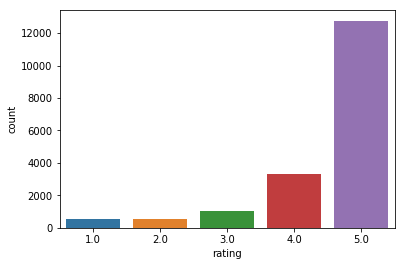

In [11]:
# Similarly let's look at ratings for productId = B0074BW614
B0074BW614_rating = ratings_raw[ratings_raw['productId'] == 'B0074BW614']['rating']
print(B0074BW614_rating.value_counts(normalize=True))
sns.countplot(B0074BW614_rating)

* Looks like this product (B0074BW614) is always highly rated. About 88% Ratings are 4 and 5

In [12]:
# Let's check what are the top 100 5 rated products
n = 100
five_rated_products = ratings_raw[ratings_raw['rating'] == 5]
five_rated_products['productId'].value_counts().head(n)

B0074BW614    12765
B007WTAJTO    10674
B0019EHU8G    10637
B003ES5ZUU     8480
B00DR0PDNE     8281
B006GWO5WK     8111
B007R5YDYA     7862
B003ELYQGG     7754
B000LRMS66     7324
B0002L5R78     7146
B00622AG6S     7063
B003LR7ME6     6196
B008OHNZI0     5773
B009SYZ8OC     5529
B00BGA9WK2     5123
B002WE6D44     4874
B00BGGDVOO     4765
B00316263Y     4330
B005HMKKH4     4246
B0098F5W0Q     4021
B009A5204K     3975
B004QK7HI8     3929
B002V88HFE     3816
B0044YU60M     3511
B0012S4APK     3507
B0052YFYFK     3488
B002MAPRYU     3414
B000QUUFRW     3399
B004GF8TIK     3376
B0087NZ31S     3350
              ...  
B00D5Q75RC     2263
B00DVFLJDS     2224
B00GTGETFG     2222
B005KDYBIO     2187
B0088LYCZC     2141
B009WU5XUG     2139
B00E055H5O     2073
B00D5T3QK4     2069
B003ZBZ64Q     2064
B002QEBMAK     2055
B0053NBLFW     2054
B000BKJZ9Q     2043
B007B31IAK     2038
B004LTEUDO     2027
B001GTT0VO     2018
B005QBK5V2     2012
B002Y6CJJ8     1992
B008THTWIW     1989
B0058UUR6E     1986


5.0    55.563308
4.0    18.988874
1.0    11.524916
3.0     8.090925
2.0     5.831977
Name: rating, dtype: float64


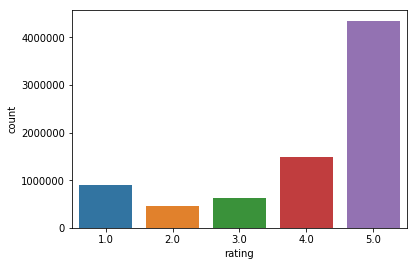

In [13]:
print(ratings_raw['rating'].value_counts(normalize=True)*100)
sns.countplot(ratings_raw['rating'])

* Amazon must be doing something right in Electronics department as more than 74% ratings are above 4 and 5

In [14]:
# Let's try to understand the rating pattern of top 100 users that have rated the most number of times
n = 100
top_n_most_rating_users = ratings_raw['userId'].value_counts().head(n)
top_n_user_ratings = ratings_raw[ratings_raw['userId'].isin(top_n_most_rating_users.keys().tolist())]

In [15]:
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(index=top_n_user_ratings['userId'], columns=top_n_user_ratings['rating']).style.background_gradient(cmap=cm)

rating,1.0,2.0,3.0,4.0,5.0
userId,,,,,
A11I1I9QLMAM1A,2,2,17,61,123
A11KZ906QD08C5,12,0,12,45,147
A12DQZKRKTNF5E,1,8,29,108,106
A15QYHQH80W30L,9,8,20,11,109
A17BUUBOU0598B,5,28,82,139,7
A17HMM1M7T9PJ1,0,6,14,64,67
A18HE80910BTZI,2,15,41,76,43
A19W47CXJJP1MI,2,4,17,44,129
A1BT6TL7UCIC5Y,5,3,8,56,85


In [16]:
n = 100
bottom_n_most_rating_users = ratings_raw['userId'].value_counts().tail(n)
bottom_n_user_ratings = ratings_raw[ratings_raw['userId'].isin(bottom_n_most_rating_users.keys().tolist())]

In [17]:
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(index=bottom_n_user_ratings['userId'], columns=bottom_n_user_ratings['rating']).style.background_gradient(cmap=cm)

rating,1.0,2.0,3.0,4.0,5.0
userId,,,,,
A11446V0A0ZI50,0,0,0,0,1
A11ZEUEZIPTCE7,1,0,0,0,0
A13IJ8UMS1W8TN,0,0,0,0,1
A14D0NDZC1C8B1,1,0,0,0,0
A14YJTSSJEINY6,0,0,1,0,0
A156MNFYRKL4GM,1,0,0,0,0
A15SY05BDBKKC9,0,0,0,0,1
A187UC4CNDG19X,0,0,0,1,0
A1BPI5RP039KQ2,0,0,0,0,1


* Many of the users in above list have given rating of 5. They could be the users that either don't buy too frequently or don't rate too frequently. We can check the purchases of these users. If they fall in first category (don't buy too frequently), then we can devise ways like marketing emails, calls for them to buy more. And if they fall in second category (don't rate frequently), we can send them emails to rate the products they have bought recently. Anyways, there are good insights that can be analyzed/utilized.

In [18]:
# Let's try to understand the rating pattern of top 100 products that have been rated the most number of times
n = 100
top_n_most_rated_products = ratings_raw['productId'].value_counts().head(n)
top_n_product_ratings = ratings_raw[ratings_raw['productId'].isin(top_n_most_rated_products.keys().tolist())]

In [19]:
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(index=top_n_product_ratings['productId'], columns=top_n_product_ratings['rating']).style.background_gradient(cmap=cm)

rating,1.0,2.0,3.0,4.0,5.0
productId,,,,,
B00007E7JU,66,69,178,702,2508
B0001FTVEK,490,395,430,1302,2728
B0002L5R78,695,212,381,1053,7146
B000B9RI14,53,35,82,191,2635
B000BKJZ9Q,99,79,170,828,2043
B000BQ7GW8,218,67,146,545,3299
B000I68BD4,743,627,726,1042,1765
B000JMJWV2,401,97,130,436,2382
B000LRMS66,130,76,188,997,7324


* Insights such as these can be shared with the vendors selling these products (at a price), so they know how customers rate their products.

In [20]:
# We have over 4 million users. Not everyone really gives reviews. So to build the model, let's pull only those users that 
# have more thank 50 ratings.
n = 50
user_total_ratings_df = ratings_raw["userId"].value_counts()
users_with_more_than_n_ratings = user_total_ratings_df[user_total_ratings_df > n]

In [21]:
len(users_with_more_than_n_ratings)

1466

* So there are 1446 users that have more than 50 ratings

In [22]:
ratings = ratings_raw[ratings_raw["userId"].isin(users_with_more_than_n_ratings.keys().tolist())]
ratings.shape

(122171, 3)

* So out of 4 million users only 1446 users have more than 50 ratings (0.034%). The total ratings that we are going to process comes down from 7.8 million to 0.122 million. This is a significant drop.

## Popularity Recommender Model

In [23]:
# Let's see which products are popular (Just pulling 20 popular products)
# Instead of ratings dataframe (which is the dataframe that contains ratings for only those subset of users
# that have given more than 50 ratings), I am going to use the original ratings_raw dataframe for this purpose.
# This should give me more realistic view of popular products.
top = 20
ratings_raw['productId'].value_counts().head(top)

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
B008OHNZI0     8966
B003LR7ME6     8840
B000LRMS66     8715
B009SYZ8OC     8370
B00BGA9WK2     7561
B004QK7HI8     7060
B009A5204K     7059
B00BGGDVOO     6893
B0098F5W0Q     6616
B002MAPRYU     6599
Name: productId, dtype: int64

In [24]:
# Let's encapsulate this into a reusable class
class PopularityRecommender:
    def __init__(self, data):
        self.data_popular_sorted = data['productId'].value_counts()
    
    
    def recommend(self, top=5):
        return self.data_popular_sorted.head(top).keys().tolist()


In [25]:
# Let's pull some recommendation. This class can be utilized by any web-interface.
model_popularity = PopularityRecommender(ratings_raw)
model_popularity.recommend(10)

['B0074BW614',
 'B00DR0PDNE',
 'B007WTAJTO',
 'B0019EHU8G',
 'B006GWO5WK',
 'B003ELYQGG',
 'B003ES5ZUU',
 'B007R5YDYA',
 'B00622AG6S',
 'B0002L5R78']

## User-User Collaborative Filtering

In [26]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split, GridSearchCV

In [27]:
cols = ["Model Number", "Type", "Details", "RMSE"]
rs = ResultStorage(cols)

In [28]:
# A reader is still needed but only the rating_scale param is required.
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings, reader)

In [29]:
trainset, testset = train_test_split(data, test_size=.30)

In [30]:
trainset.n_users, trainset.n_items, trainset.n_ratings

(1466, 37358, 85519)

In [31]:
len(testset)

36652

In [32]:
testset[0:5]

[('AQM0K7MBBT4AY', 'B00IEZGY2Q', 5.0),
 ('AG6TX1ZJHLMO7', 'B002Q88CGI', 4.0),
 ('A3BI8BKIHESDNQ', 'B0003NN83K', 5.0),
 ('A2NSMJVQY0RV9S', 'B007YX9O94', 4.0),
 ('AAA0TUKS5VBSA', 'B00D50UNRM', 5.0)]

In [33]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
m1 = KNNWithMeans(k=40, sim_options={'name': 'pearson_baseline', 'user_based': True}, verbose=True)
m1.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [34]:
user_id = 'A27M75LRSJ788H'
prod_id = 'B007SU0LBS'
# get a prediction for a specific user and item.
pred = m1.predict(user_id, prod_id, verbose=True)

user: A27M75LRSJ788H item: B007SU0LBS r_ui = None   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unkown.'}


In [35]:
m1_pred = m1.test(testset)
rmse = accuracy.rmse(m1_pred, verbose=True)
print(rmse)
res = ["m1", "User-User Collaborative", get_model_parms(m1), rmse]
rs.append(res)

RMSE: 1.0552
1.0552202032317295


In [36]:
# Let's use GridSearchCV to see if we can get better accuracy than above default model.
param_grid = {'k' : [10, 20, 30, 40, 50],
              'sim_options': {'name': ['pearson_baseline', 'cosine', 'msd'], 
                               'user_based': [True],
                               'min_support' : [1, 5]
                             }
             }
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=3, return_train_measures=False)
gs.fit(data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity ma

In [37]:
results_df = pd.DataFrame.from_dict(gs.cv_results)

In [38]:
results_df

,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_k,param_sim_options
0,1.059449,1.049601,1.058694,1.055915,0.004475,20,0.781334,0.776416,0.782120,0.779957,0.002524,30,1.024830,0.004198,1.405348,0.075312,"{'k': 10, 'sim_options': {'name': 'pearson_bas...",10,"{'name': 'pearson_baseline', 'user_based': Tru..."
1,1.038146,1.026952,1.034558,1.033218,0.004667,1,0.779988,0.775157,0.779084,0.778076,0.002097,11,0.851003,0.007347,1.243141,0.073880,"{'k': 10, 'sim_options': {'name': 'pearson_bas...",10,"{'name': 'pearson_baseline', 'user_based': Tru..."
2,1.066362,1.059350,1.063455,1.063056,0.002876,25,0.772285,0.769628,0.772529,0.771481,0.001314,5,0.902764,0.011462,1.504236,0.091520,"{'k': 10, 'sim_options': {'name': 'cosine', 'u...",10,"{'name': 'cosine', 'user_based': True, 'min_su..."
3,1.039817,1.028954,1.035417,1.034729,0.004461,6,0.780350,0.776084,0.778423,0.778286,0.001744,20,0.417998,0.008382,1.275278,0.051356,"{'k': 10, 'sim_options': {'name': 'cosine', 'u...",10,"{'name': 'cosine', 'user_based': True, 'min_su..."
4,1.069510,1.062966,1.066363,1.066280,0.002672,30,0.774113,0.771320,0.774475,0.773302,0.001410,10,0.259034,0.002561,1.523564,0.072944,"{'k': 10, 'sim_options': {'name': 'msd', 'user...",10,"{'name': 'msd', 'user_based': True, 'min_suppo..."
5,1.039946,1.029059,1.035619,1.034875,0.004476,15,0.780545,0.776082,0.778532,0.778386,0.001825,25,0.243104,0.002209,1.244532,0.073187,"{'k': 10, 'sim_options': {'name': 'msd', 'user...",10,"{'name': 'msd', 'user_based': True, 'min_suppo..."
6,1.059460,1.049593,1.058605,1.055886,0.004464,19,0.781323,0.776385,0.782025,0.779911,0.002510,29,0.990828,0.007987,1.356382,0.059573,"{'k': 20, 'sim_options': {'name': 'pearson_bas...",20,"{'name': 'pearson_baseline', 'user_based': Tru..."
7,1.038145,1.026952,1.034561,1.033219,0.004667,4,0.779987,0.775158,0.779086,0.778077,0.002097,15,0.840176,0.002938,1.306292,0.074843,"{'k': 20, 'sim_options': {'name': 'pearson_bas...",20,"{'name': 'pearson_baseline', 'user_based': Tru..."
8,1.065299,1.058363,1.062424,1.062029,0.002845,24,0.771397,0.768937,0.771803,0.770712,0.001266,4,0.894641,0.004666,1.521044,0.079322,"{'k': 20, 'sim_options': {'name': 'cosine', 'u...",20,"{'name': 'cosine', 'user_based': True, 'min_su..."
9,1.039829,1.028950,1.035416,1.034731,0.004467,7,0.780353,0.776088,0.778405,0.778282,0.001743,19,0.407614,0.002576,1.267091,0.065908,"{'k': 20, 'sim_options': {'name': 'cosine', 'u...",20,"{'name': 'cosine', 'user_based': True, 'min_su..."


In [39]:
gs.best_params

{'rmse': {'k': 10,
  'sim_options': {'name': 'pearson_baseline',
   'user_based': True,
   'min_support': 5}},
 'mae': {'k': 50,
  'sim_options': {'name': 'cosine', 'user_based': True, 'min_support': 1}}}

In [40]:
gs.best_params

{'rmse': {'k': 10,
  'sim_options': {'name': 'pearson_baseline',
   'user_based': True,
   'min_support': 5}},
 'mae': {'k': 50,
  'sim_options': {'name': 'cosine', 'user_based': True, 'min_support': 1}}}

In [41]:
# Let's fit the model with first set of best parameters - rmse
m2 = KNNWithMeans(k=20, sim_options={'name': 'pearson_baseline', 'user_based': True, 'min_support': 5}, verbose=True)
m2.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [42]:
m2_pred = m2.test(testset)
rmse = accuracy.rmse(m2_pred, verbose=True)
rmse
# So we are certainly getting better accuracy than the model with default parameters

RMSE: 1.0332


1.0332369428788288

In [43]:
res = ["m2", "User-User Collaborative", get_model_parms(m2), rmse]
rs.append(res)

In [44]:
# Let's fit the model with second set of best parameters - mae
m3 = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': True, 'min_support': 1}, verbose=True)
m3.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [45]:
m3_pred = m3.test(testset)
rmse = accuracy.rmse(m3_pred, verbose=True)
rmse
# This model give approximately same accuracy as the model with default parameters

RMSE: 1.0578


1.0577673170227544

In [46]:
res = ["m3", "User-User Collaborative", get_model_parms(m3), rmse]
rs.append(res)

In [47]:
# Let's Summarize the results
rs.summarize()

,Model Number,Type,Details,RMSE
0,m1,User-User Collaborative,"k = 40, sim_options={'name': 'pearson_baseline...",1.055220
1,m2,User-User Collaborative,"k = 20, sim_options={'name': 'pearson_baseline...",1.033237
2,m3,User-User Collaborative,"k = 50, sim_options={'name': 'cosine', 'user_b...",1.057767


In [48]:
m2_pred[0:3]

[Prediction(uid='AQM0K7MBBT4AY', iid='B00IEZGY2Q', r_ui=5.0, est=4.25, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AG6TX1ZJHLMO7', iid='B002Q88CGI', r_ui=4.0, est=4.339285714285714, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3BI8BKIHESDNQ', iid='B0003NN83K', r_ui=5.0, est=4.647058823529412, details={'actual_k': 0, 'was_impossible': False})]

In [49]:
# Since model m2 gives the best accuracy, let's pick up the predictions made for m2 model to build our top n recommendations
# for a given user
get_top_n(m2_pred, 'A2ZY49IDE6TY5I')

[('B009WZRAQQ', 4.7),
 ('B003YTPP72', 4.633333333333333),
 ('B009O7XO1C', 4.4906779661016945),
 ('B0079UAT0A', 4.43139777578408),
 ('B009NHWVIA', 4.369608190961018),
 ('B004TESXU2', 4.2648066511535445),
 ('B0052UQYWQ', 4.2648066511535445),
 ('B000I6F0T2', 4.2648066511535445),
 ('B008JBRHJ4', 4.2648066511535445),
 ('B001TI9Y2M', 4.2648066511535445),
 ('B009T0NFTA', 4.171621621621621),
 ('B008X9ZBVI', 4.15438041387742),
 ('B000001ON6', 4.05),
 ('B008HFCI50', 4.05),
 ('B005JXAEGS', 4.05),
 ('B009XEBBC0', 4.05),
 ('B00EPQ97C2', 4.05),
 ('B009HQCARY', 4.05),
 ('B00CIRLJPI', 4.05),
 ('B009X3V8EW', 4.05),
 ('B003B3N258', 4.05),
 ('B0074BW614', 4.05),
 ('B002L6HEAU', 4.05),
 ('B004X8R7VA', 4.05),
 ('B00BDRX7ZE', 4.05),
 ('B004HEBXFQ', 4.05),
 ('B008DBI5RI', 4.05),
 ('B00AYUZARY', 4.05),
 ('B00007EDM8', 4.05),
 ('B003ZX8B3W', 4.05),
 ('B00BXF5FU6', 4.05),
 ('B004R7A9NU', 4.05),
 ('B00AYTW80M', 4.004644660065083),
 ('B008X9Z528', 3.8746494603150725),
 ('B008X9Z3UC', 3.660450885742403),
 ('B00A3Y

How would I use User-User Collaborative Filtering in real world:
-------------------------------------------------------------------------------------------

    We can show some recommendations, when a user logs into his/her account. Some of these recommendations are dervied based on all the other users that this user is similar to. The products that these users have used (& rated), their ratings are averaged in order to predict the rating for the logged in user. The products are then sorted in descending order of predicted rating. The highest rated products are then displayed to logged in user upon login. Seeing the products that are consumed by the users that are similar to the logged in user, increases the probability of logged in user purchasing the product.
    
    So what model.fit() does is just computes the similarity of a user to other users. Here we have tested the model by using 30% of our data as test data. Since we already know the ratings of these test records, it gives us an opportunity to assess our model's accuracy. 
    
    But in real world, what we can do is create a list of products that the logged in user has not used/rated yet. And use our model to predict the rating for each of those products. Then we can show the products with highest predicted rating to the logged in user.
    
    Technically above can be achieved by using the predict method available. Unfortunately, this method accepts only one uid and itemId combination. So we could write a wrapper around this method to predict the rating for multiple product ids. Alternatively, we can use not so obvious method test() too (as we have done in the code above).

## Item-Item Collaborative Filtering

    Some theory about Item-Item Collaborative Filtering from Wikipedia (URL: https://en.wikipedia.org/wiki/Item-item_collaborative_filtering)

    Earlier collaborative filtering systems based on rating similarity between users (known as user-user collaborative filtering) had several problems:

    1. systems performed poorly when they had many items but comparatively few ratings
    2. computing similarities between all pairs of users was expensive
    3. user profiles changed quickly and the entire system model had to be recomputed

    Item-item models resolve these problems in systems that have more users than items. Item-item models use rating distributions per item, not per user. With more users than items, each item tends to have more ratings than each user, so an item's average rating usually doesn't change quickly. This leads to more stable rating distributions in the model, so the model doesn't have to be rebuilt as often. When users consume and then rate an item, that item's similar items are picked from the existing system model and added to the user's recommendations.

In [50]:
# In our dataset (training), we have less users (1466) compared to items (29797). Which beats one of the assumptions 
# behind Item-Item Collaborative Filtering. So we should not be surprised, if we don't see much or any improvement over 
# User-User Collaborative Filtering. Let's give a shot now.

In [51]:
# Use user_based is set to False, which runs Item-Item Collaborative Filtering.
m4 = KNNWithMeans(k=40, sim_options={'name': 'cosine', 'user_based': False}, verbose=False)

In [52]:
# So let's drop the trainset size. surprise train_test_split allows to specify not just test_size but train_size too. 
# Let's drop it to 50% (from 70% earlier) and then try to fit the model
trainset, testset =  train_test_split(data, test_size=0.30, train_size=0.50)

In [53]:
trainset.n_users, trainset.n_items, trainset.n_ratings

(1466, 29827, 61085)

In [54]:
m4.fit(trainset)

    While above method is running, I can see that my machine's memory consumption (observed through Task Manager) reached almost 100% (16 GB). But good part is it could complete the execution. The key observation is Surprise package is highly dependent on the amount of memory you have. This is not good as with Machine Learning, you can have quite huge amount of data. Infact, it's good to have more data to train your ML model. Need to investigate if Surprise can be used over Spark or Map Reduce in a Clustered environment.

In [55]:
m4_pred = m4.test(testset)
rmse = accuracy.rmse(m4_pred, verbose=True)
print(rmse)
res = ["m4", "Item-Item Collaborative", get_model_parms(m4), rmse]
rs.append(res)

RMSE: 1.1417
1.141744955941903


    I wanted to try GridSearchCV but from above observation, I believe it may get stuck due to memory. So let's just try a few random variations and see how it works.

There are a few options I could try to overcome this error. 
1. Decrease the trainset size even further
2. Don't hold the results of predictions in memory as I am currently doing (m1_pred, m2_pred, m3_pred etc.)

But all of these are just workarounds that doesn't address the root cause. May be, the answer is running Surprise in a Big Data Cluster using Spark or MapReduce. 

In [56]:
get_top_n(m4_pred, 'A2ZY49IDE6TY5I')

[('B003EEMDMC', 5),
 ('B009NHWVIA', 4.605828390413791),
 ('B008X9Z3UC', 4.4962544586851925),
 ('B0079UAT0A', 4.491835082251846),
 ('B006ZBWV0K', 4.404197128766617),
 ('B004CLYEFK', 4.370219072825623),
 ('B0041H8PH8', 4.337498212498213),
 ('B00634PLTW', 4.316741692734289),
 ('B008S2DCIE', 4.265678971924368),
 ('B000I6F0T2', 4.265678971924368),
 ('B0058PJH5Q', 4.265678971924368),
 ('B005KP76HU', 4.265678971924368),
 ('B007PRHMOS', 4.265678971924368),
 ('B007ZFP3MS', 4.265678971924368),
 ('B000001ON6', 4.265678971924368),
 ('B004QM8CJO', 4.265678971924368),
 ('B006GWO5WK', 4.132547742582153),
 ('B005EWB37S', 4.079333657471037),
 ('B0013CXZZ6', 4.0),
 ('B004FEEZHQ', 4.0),
 ('B004XVN17G', 3.9977355072463765),
 ('B009T0NFTA', 3.8841277841781876),
 ('B007BY0MIS', 3.748249929962527),
 ('B00B1HUIE4', 3.5),
 ('B0041OQKIC', 3.5),
 ('B00007EDM8', 3.4635944700460826),
 ('B004YIZVW6', 3.213345864661654),
 ('B007X3VEUW', 3.132238708687984)]

In [57]:
# Let's Summarize the results
rs.summarize()

,Model Number,Type,Details,RMSE
0,m1,User-User Collaborative,"k = 40, sim_options={'name': 'pearson_baseline...",1.055220
1,m2,User-User Collaborative,"k = 20, sim_options={'name': 'pearson_baseline...",1.033237
2,m3,User-User Collaborative,"k = 50, sim_options={'name': 'cosine', 'user_b...",1.057767
3,m4,Item-Item Collaborative,"k = 40, sim_options={'name': 'cosine', 'user_b...",1.141745


    From above results, it's obvious that for given dataset m2 gives the least error. So we should go for m2.